<a href="https://colab.research.google.com/github/jdalvaradocol/EIA_DL/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Descargamos los datos en el almacenamiento temporal de Google Colab
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

# run unzip el conjunto de datos
!unzip -q kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   102M      0  0:00:07  0:00:07 --:--:--  108M


In [7]:
!ls
!ls PetImages

 CDLA-Permissive-2.0.pdf   kagglecatsanddogs_5340.zip   PetImages  'readme[1].txt'   sample_data
Cat  Dog


In [8]:
# Elimina las imagenes que noe stan en formato tipo JFIF
num = 0

for folder_name in ("Cat", "Dog"):
  folder_path = os.path.join("PetImages", folder_name)
  for fname in os.listdir(folder_path):
    path = os.path.join(folder_path, fname)

    try:
      fobj = open(path,"rb")
      is_jfif = b"JFIF" in fobj.peek(10)
    finally:
      fobj.close()

    if not is_jfif:
      num += 1
      # eliminar la imagen de otro tipo de archivo
      os.remove(path)


print("Imagenes eliminadas = ", num)


Imagenes eliminadas =  1590


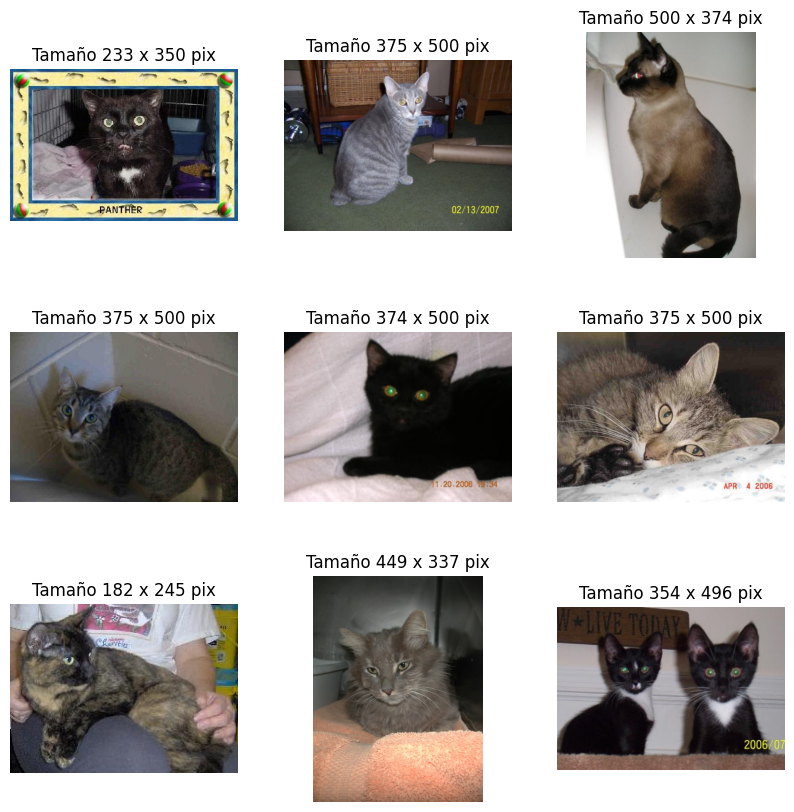

In [12]:
# Visualiza las primeras 9 iamgenes de la carpeta cat
plt.figure(figsize=(10,10))
folder_path = os.path.join("PetImages", "Cat")

for i, image in enumerate(os.listdir(folder_path)[:9]):
  img_path = os.path.join(folder_path, image)
  img = mpimg.imread(img_path)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(img)
  plt.title(f"Tamaño {img.shape[:2][0]} x {img.shape[:2][1]} pix")
  plt.axis("off")

plt.show()


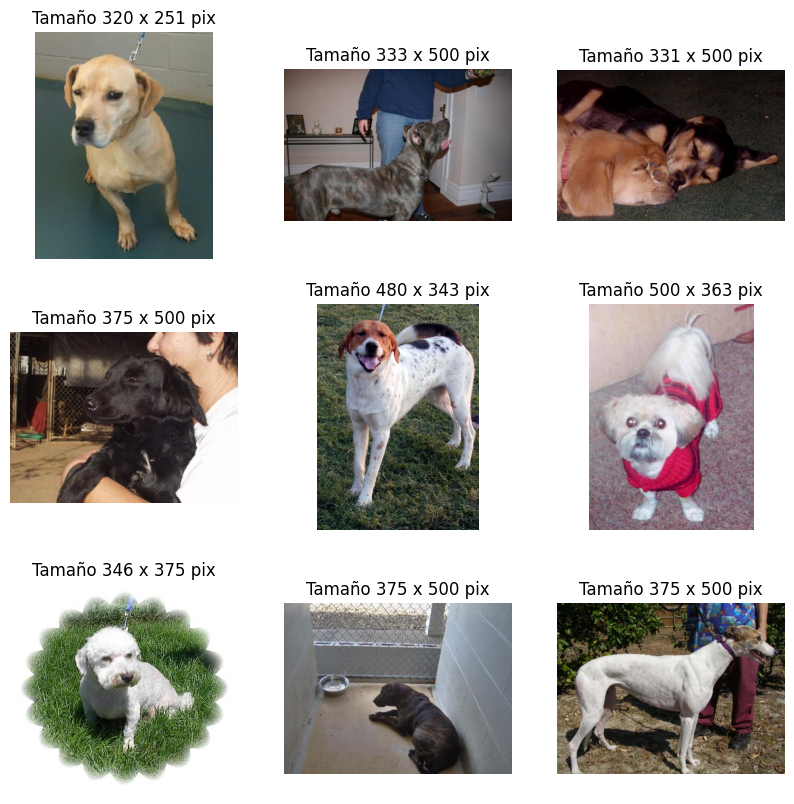

In [13]:
# Visualiza las primeras 9 iamgenes de la carpeta cat
plt.figure(figsize=(10,10))
folder_path = os.path.join("PetImages", "Dog")

for i, image in enumerate(os.listdir(folder_path)[:9]):
  img_path = os.path.join(folder_path, image)
  img = mpimg.imread(img_path)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(img)
  plt.title(f"Tamaño {img.shape[:2][0]} x {img.shape[:2][1]} pix")
  plt.axis("off")

plt.show()

In [16]:

# Estandarizar el tamaño de las imagenes
image_size = (100,100)

# Tamaño del paquete del batch : indica cuantas imagenes se van a procesar
batch_size = 64

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split = 0.3,
    subset = "both",
    seed = 1233,
    image_size = image_size,
    batch_size = batch_size,
    )

Found 23410 files belonging to 2 classes.
Using 16387 files for training.
Using 7023 files for validation.


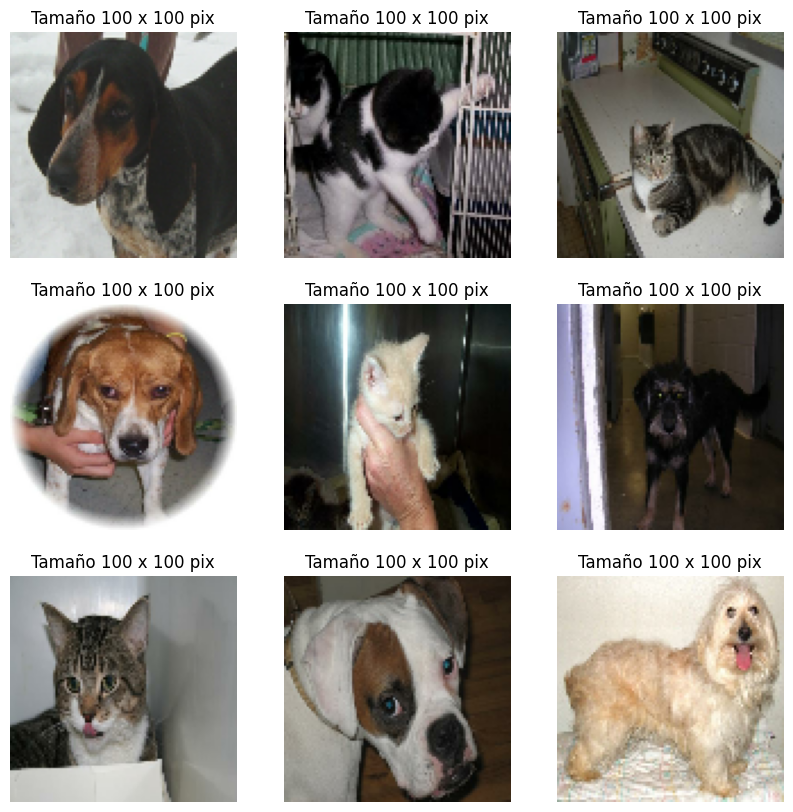

In [18]:

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.array(images[i]).astype("uint8"))
    plt.title(f"Tamaño {images[i].shape[0]} x {images[i].shape[1]} pix")
    plt.axis("off")

plt.show()

In [19]:
# Conjunto de datos para entrenar la RNA
len(train_ds)

257

In [21]:
batch = list(train_ds.take(1))
print("Numero de imagenes en el batch", len(batch[0][0]))
print("Etiquetas de las imagenes en el batch", batch[0][1])


Numero de imagenes en el batch 64
Etiquetas de las imagenes en el batch tf.Tensor(
[0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1], shape=(64,), dtype=int32)


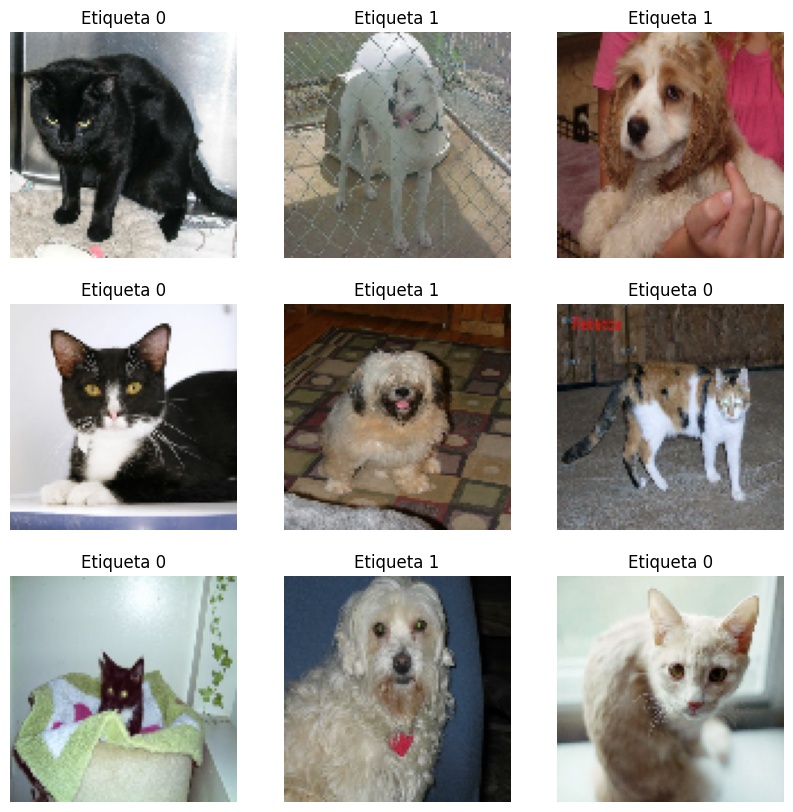

In [22]:
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.array(images[i]).astype("uint8"))
    plt.title(f"Etiqueta {labels[i]}")
    plt.axis("off")

plt.show()